# Online Food Delivery Preferences

# (insert questions, rationale, description)

Motivation:   
We want to find how different variables will affect the satisfaction of a food delivery order  
We utilised this online food delivery dataset from Bangalore.  

  
Main Question: 
Which variable(s) can improve customer satisfaction of a food order?  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from wordcloud import WordCloud
from collections import Counter
sb.set()

In [2]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")

In [3]:
foodDelivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
foodDelivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [5]:
foodDelivery.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Univariate Statistics

#### For our dataset, since there are 55 variables, we have broken down the dataset into a few smaller categories:
- Consumer Demographics
- Consumer Preferences
- Purchase Demand
- No Purchase
- Cancellation
- Delivery Time
- Overall Quality 

In [6]:
reviews = pd.DataFrame(foodDelivery['Reviews']) # x
satisfaction = pd.DataFrame(foodDelivery['Output']) # y

In [7]:
reviews.head()

,Reviews
0,Nil\r\n
1,Nil
2,"Many a times payment gateways are an issue, so..."
3,nil
4,NIL


In [8]:
# !!! This will edit the dataset
# Datacleaner is an open-source library used for automating data cleaning, 
# built on Pandas Dataframe and Sklearn preprocessing features
#dc.autoclean(foodDelivery).head(None)

# Text Cleaning - Sentiment Analysis

Two libraries we will be using:
> - NLTK  
> - Pattern

In [9]:
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


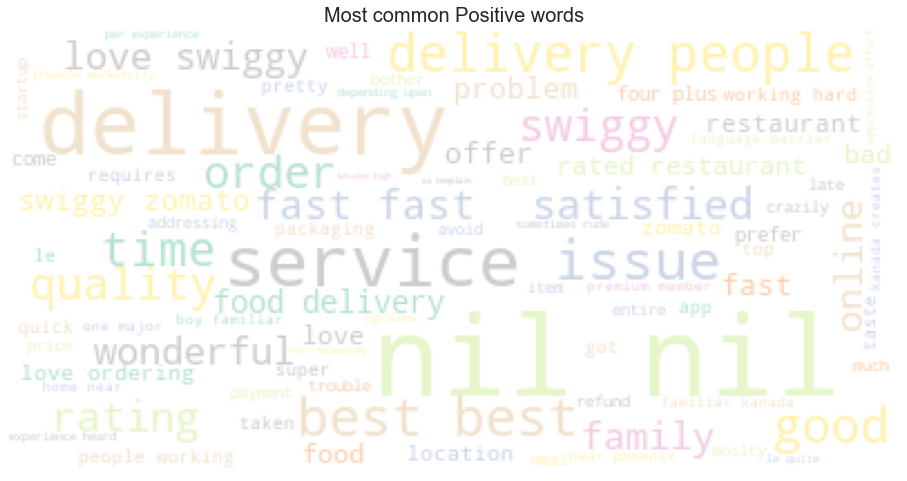

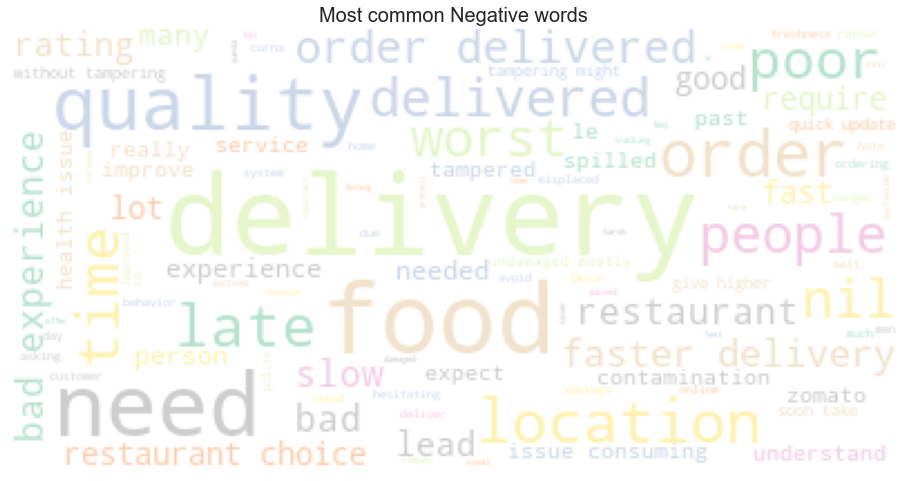

In [19]:
# Display positive and negative words in Reviews
def generate_wordcloud(words, satisfaction):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(satisfaction), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    
foodDelivery['clean']= foodDelivery["Reviews"].map(clean)
foodDelivery['clean_text']= foodDelivery['clean'].apply(lambda x: " ".join([str(word) for word in x]))

positive_words=" ".join(foodDelivery[foodDelivery.Output=="Yes"]['clean_text'].values)
negative_words=" ".join(foodDelivery[foodDelivery.Output=="No"]['clean_text'].values)

generate_wordcloud(positive_words,"Positive")
generate_wordcloud(negative_words,"Negative")

In [14]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
foodDelivery.head(None)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews,clean,clean_text
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n,[nil],nil
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,[nil],nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...","[many, time, payment, gateway, issue, getting,...",many time payment gateway issue getting refund...
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil,[nil],nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL,[nil],nil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Yes,Nil,[nil],nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil,[nil],nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,[nil],nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...,"[language, barrier, also, one, major, issue, m...",language barrier also one major issue moslty d...


In [15]:
# Forming DataFrame of TDIDF values from all 388 reviews
def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

tfidf_vect = TfidfVectorizer(max_features = 1000) # TDIDF Vectorizer
tfidf_vect_fit = tfidf_vect.fit(foodDelivery['clean_text']) # Fitting 
X_train = vectorize(foodDelivery['clean_text'],tfidf_vect_fit)
X_train

,abused,abusing,add,addressing,aggregator,also,amazing,app,appreciate,apps,...,wonderful,word,work,working,worry,worst,would,wrong,yes,zomato
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
385,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,0.0,0.0,0.0,0.273231,0.0,0.245816,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since our models cannot use text to train and test, we need to convert text into either numbers or arrays    
To convert text into numbers, we can simply use datasets of positive words or negative words to +1 or -1 to a sentiment count respectively (Does Sentiment Analysis based on connatation of word)   
To convert text into arrays, Sklearn provides a few ways:
>One-hot Encoding, this is used more on categorical variables, not suitable for text data  
>Bag of Words, converting the Reviews data into array of numbers that correspond to each word

Sklearn provides 3 ways to do this, CountVectorizer, TfidfVectorizer, and HashingVectorizer (Does Sentiment Analysis based on rareness of words)    
>CountVectorizer simply tokenizes existing words into an array.
>TfidfVectorizer (Term-Frequency Inverse-Document-Frequency) builts on CountVectorizer by calculating word frequencies.
>HashingVectorizer builts on TfidfVectorizer by hashing the words instead. This is useful for very large sets of words.  

We will be using TfidfVectorizer since it has a higher accuracy than CountVectorizer and our dataset is not that large 

TfidfVectorizer will calculate the Term Frequency(Number of times a word appears in a sentence) and Inverse Document Frequency (How rare or common a word is in a sentence) to derive TF-IDF  
Term Frequency tf(t, d) = (Number of times term t appears in a document) / (Total number of terms in the document)  
Inverse Document Frequency idf(t) = log ( Number of sentences / df(t) ) + 1   
TF-IDF(t, d) = tf(t, d) * idf(t)  

In [16]:
satisfaction_y = satisfaction['Output'] # extract the column of "Output", throwing away the index
reviews_x_train, reviews_x_test, satisfaction_y_train, satisfaction_y_test = train_test_split(X_train, satisfaction_y, test_size = 0.2, random_state = 0)

[Text(669.6, 1087.2, 'X[189] <= 0.092\ngini = 0.346\nsamples = 310\nvalue = [69, 241]\nclass = Yes'),
 Text(334.8, 652.32, 'X[14] <= 0.38\ngini = 0.294\nsamples = 291\nvalue = [52, 239]\nclass = Yes'),
 Text(167.4, 217.44000000000005, 'gini = 0.267\nsamples = 284\nvalue = [45, 239]\nclass = Yes'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = No'),
 Text(1004.4000000000001, 652.32, 'X[10] <= 0.228\ngini = 0.188\nsamples = 19\nvalue = [17, 2]\nclass = No'),
 Text(837.0, 217.44000000000005, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]\nclass = No'),
 Text(1171.8, 217.44000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

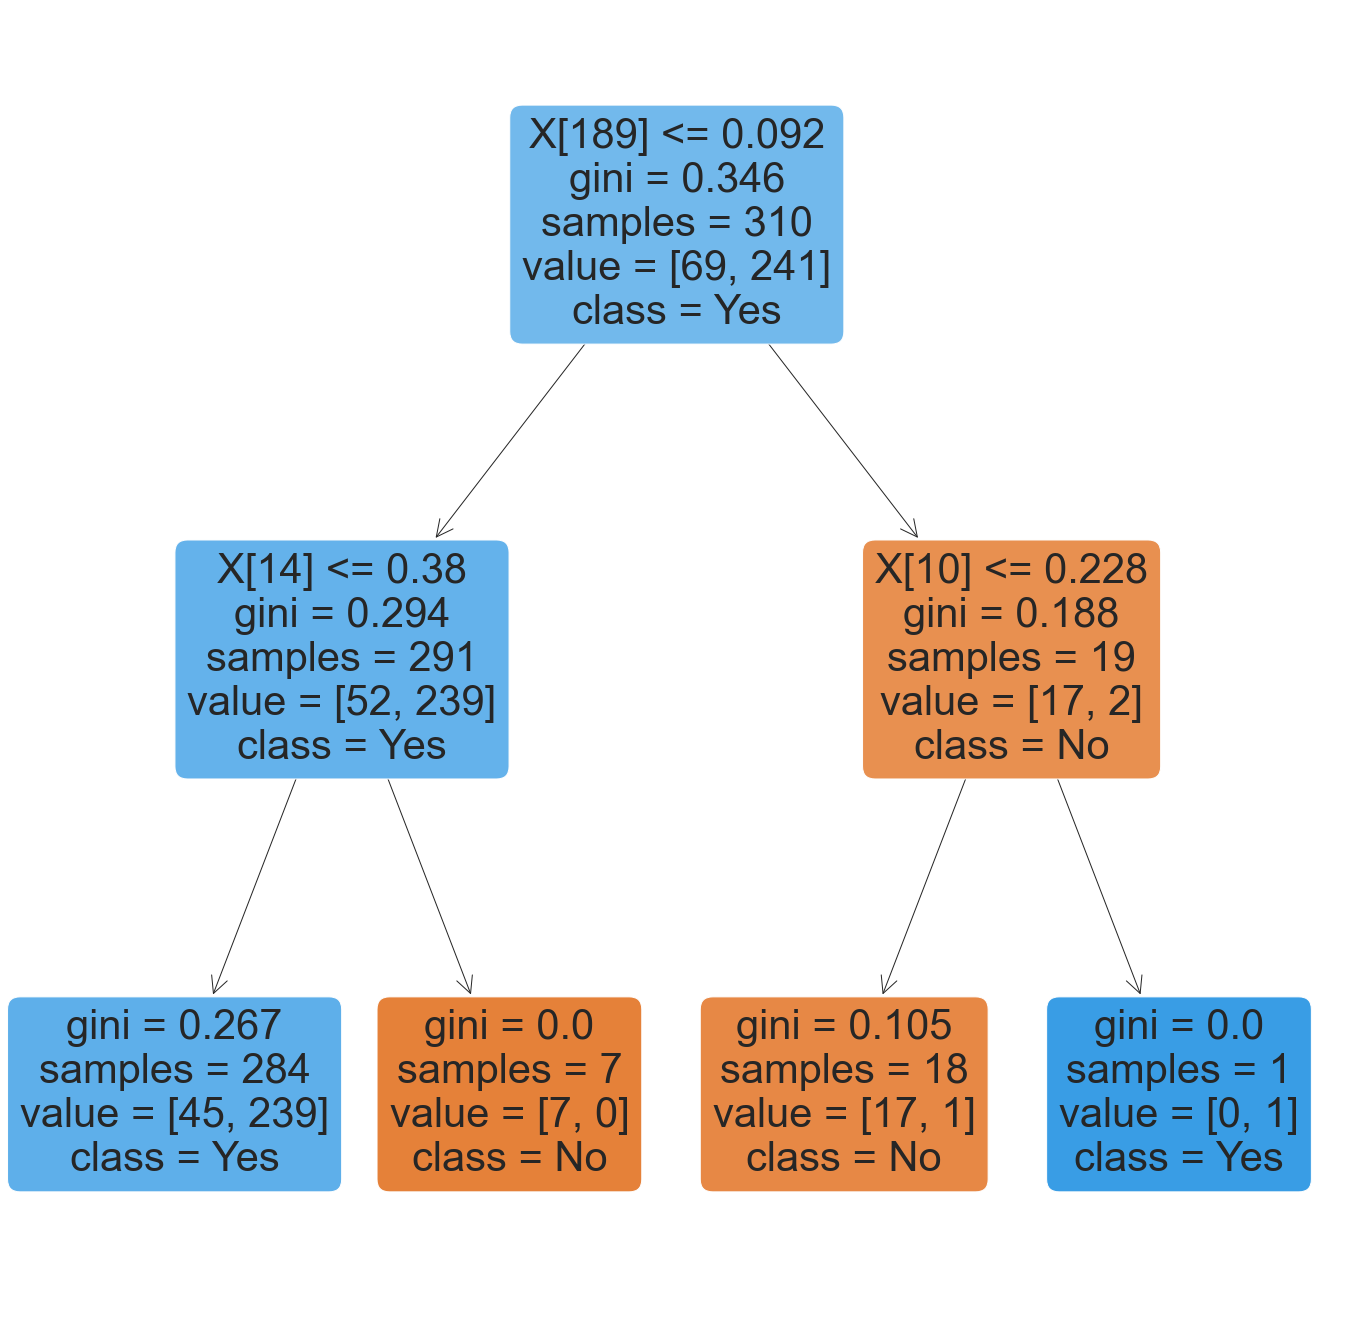

In [17]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(reviews_x_train, satisfaction_y_train)
f = plt.figure(figsize=(24,24))
plot_tree(tree, filled=True, rounded=True, class_names = ["No", "Yes"])